<a href="https://colab.research.google.com/github/Jahnavi-Jaolekar/Play-Store-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Problem Statement<b>
## <b>The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

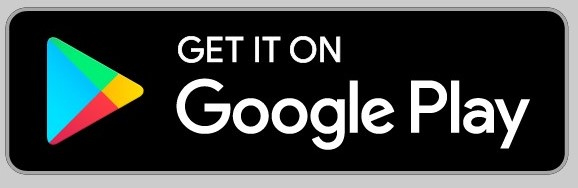

In [ ]:
Title_of_the_project= "abc"

In [ ]:
# Importing necessary libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## **Let's mount our data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
# Store the data in a variable and view it
data1='/content/drive/MyDrive/capstone project/Copy of Play Store Data.csv'
data2='/content/drive/MyDrive/capstone project/Copy of User Reviews.csv'
play_store = pd.read_csv(data1)
user_review = pd.read_csv(data2)
play_store.head()
user_review.head()
# concat_data = pd.concat([play_store,user_review],axis=1,ignore_index=True)
# concat_data

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## **Determining number of rows and columns of play store data**

In [ ]:
# Determining the shape of play store data
print(f'number of rows:{play_store.shape[0]}')
print(f'number of columns:{play_store.shape[1]}')

number of rows:10841
number of columns:13


## **Determining number of rows and columns of user review data**

In [ ]:
# Determining the shape of user review  data
print(f'number of rows:{user_review.shape[0]}')
print(f'number of columns:{user_review.shape[1]}')

number of rows:64295
number of columns:5


## **Let's just dig into the data a bit more!!**


In [ ]:
# Columns is an attribute that returns column labels, which helps to understand which column contains what type of information.
play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# similarly we will be finding out column labels for user review data as well .
user_review.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [42]:
# Defining a function to to determine number of null values,unique values and data type of all values
def give_info():
  extra_info = pd.DataFrame(index=play_store.columns)
  extra_info['data_type'] = play_store.dtypes
  extra_info['null_count'] = play_store.isnull().sum()
  extra_info['unique_count'] = play_store.nunique()
  return extra_info
  

In [ ]:
give_info()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120








*   This shows that this data contains 1474 null values in rating column, current ver has 8, android ver has 3, content rating and type each have 1 null value.
*   Only rating has numeric values in the form of floats.





In [43]:
# Defining a function to to determine number of null values,unique values and data type of all values for user review data.
def return_info():
  more_info = pd.DataFrame(index=user_review.columns)
  more_info['data_type'] = user_review.dtypes
  more_info['null_count'] = user_review.isnull().sum()
  more_info['unique_count'] = user_review.nunique()
  return more_info

In [ ]:
return_info()

,data_type,null_count,unique_count
App,object,0,1074
Translated_Review,object,26868,27994
Sentiment,object,26863,3
Sentiment_Polarity,float64,26863,5410
Sentiment_Subjectivity,float64,26863,4474


# **Dealing with null values in play store data**

In [ ]:
# Defining a function to calculate median for particular columns
def impute_median(series):
  return series.fillna(series.median)

In [ ]:
# Replacing null values in rating column with median of all values present in that column
play_store.Rating=play_store['Rating'].transform(impute_median)

In [ ]:
# Removing/droping the row containg null value for the column content rating
play_store[play_store['Content Rating'].isna()]
play_store.drop([10472],inplace=True)

In [ ]:
# Null values of type,Current Ver,Android Ver, columns are replaced with mode of respective columns.
# Mode is most recurring value of that particular column, so null values are being replaced by mode.
play_store['Type'].fillna(str(play_store['Type'].mode().values[0]),inplace=True)
play_store['Current Ver'].fillna(str(play_store['Current Ver'].mode().values[0]),inplace=True)
play_store['Android Ver'].fillna(str(play_store['Android Ver'].mode().values[0]),inplace=True)

In [ ]:
# Check if still null values are present
play_store.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# **Dealing with null values in user review data**

In [52]:
# Replacing null values in sentiment polarity column with median of all values present in that column
user_review.Sentiment_Polarity=user_review['Sentiment_Polarity'].transform(impute_median)

In [53]:
# Replacing null values in Sentiment_Subjectivity column with median of all values present in that column
user_review.Sentiment_Subjectivity=user_review['Sentiment_Subjectivity'].transform(impute_median)

In [54]:
# Null values of type,Current Ver,Android Ver, columns are replaced with mode of respective columns.
user_review['Sentiment'].fillna(str(user_review['Sentiment'].mode().values[0]),inplace=True)

In [56]:
# Check if still null values are present
user_review.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                     0
Sentiment_Polarity            0
Sentiment_Subjectivity        0
dtype: int64

# **Now let's check for duplicate values in play store data**

In [ ]:
#Presence of duplicate values, if any...
print("Number of Unique App Names=",len(play_store['App'].unique()))
print("Number of total app Name=",play_store.shape[0])
print("Duplicate apps=",len(play_store['App'])-len(play_store['App'].unique()))

Number of Unique App Names= 9659
Number of total app Name= 10840
Duplicate apps= 1181


In [ ]:
#Examining the appearence of Duplicate values
play_store[play_store['App'] == 'Coloring book moana']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2033,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [ ]:
play_store.drop_duplicates(subset='App',keep='first',inplace=True)
play_store.shape

(9659, 13)

# **Now let's check for duplicate values in user review data**

In [ ]:
#Presence of duplicate values, if any...
print("Number of Unique App Names=",len(user_review['App'].unique()))
print("Number of total app Name=",user_review.shape[0])
print("Duplicate apps=",len(user_review['App'])-len(user_review['App'].unique()))

Number of Unique App Names= 1074
Number of total app Name= 64295
Duplicate apps= 63221


## **Since one app can have 'n' number of reviews, so there are chances that data might be repeated or considered as duplicate. Therefore duplicate items in this data will not be removed or cleaned**

# **What is to be cleaned?**

### *   Reviews: It has to be a numerical column and datatype into int/float

### *   Size: Every Entry has "M" and "K" which needs to be removed and datatype into int/float
### *   Installs: Every entry has "+" at the end which needs to be removed and datatype into int/float also it has entries like "Free"

### *   Price: It has "S" at the begining it needs to be cleaned and datatype into int/float





### **Review Column**

In [58]:
 # Columns review should be of int type
play_store['Reviews'] = play_store.Reviews.replace("0.0",0)
play_store['Reviews'] = play_store.Reviews.replace("3.0M",3000000.0)
play_store['Reviews'] = play_store['Reviews'].astype(float)
play_store['Reviews'].dtype
give_info()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,float64,0,6002
Size,float64,1696,458
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


### **Size Column**

In [ ]:
# Removing the ',' and '+' Signs
play_store['Size'] = play_store.Size.apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
play_store['Size'] = play_store.Size.apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))

In [49]:
# We will be converting all the values into mega bytes (1 Mb = 1000 Kb)
# Removing M from the values in column
play_store['Size'] = play_store.Size.apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else str(x))

# Converting kilobyte to megabyte
play_store['Size'] = play_store.Size.apply(lambda x: str(x).replace('k', '000') if 'k' in str(x) else str(x))

# Replacing the Varies with device value with Nan
play_store['Size'] = play_store.Size.replace('Varies with device', np.NaN)

# Removing null values formed due to replacement of 'Varies with device' to NaN
play_store.dropna(subset = ['Size'], inplace=True)

play_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [50]:
# Convert Size Column from object to integer
play_store['Size'] = pd.to_numeric(play_store['Size'],errors='coerce')
give_info()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,float64,1696,458
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


### **Installs Column**

In [60]:
#Remove '+' sign from 
play_store['Installs'] = play_store.Installs.apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))

# Remove the ',' from the numbers.
play_store['Installs'] = play_store.Installs.apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))

# Convert it from string type to numeric type
play_store['Installs'] = pd.to_numeric(play_store['Installs'],errors='coerce')

give_info()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,float64,0,6002
Size,float64,1696,458
Installs,float64,1,20
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


### **Price Column**

In [ ]:
# Remove'$' sign
play_store['Price'] = play_store.Price.apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))

# Convert the values to Numeric type.
play_store['Price'] = pd.to_numeric(play_store['Price'],errors='coerce')
play_store.describe()

,Reviews,Size,Installs,Price
count,9.659000e+03,314.000000,9.659000e+03,9659.000000
mean,2.165926e+05,449.934713,7.777507e+06,1.099299
std,1.831320e+06,304.217489,5.375828e+07,16.852152
min,0.000000e+00,8.500000,0.000000e+00,0.000000
25%,2.500000e+01,192.250000,1.000000e+03,0.000000
50%,9.670000e+02,411.500000,1.000000e+05,0.000000
75%,2.940100e+04,715.500000,1.000000e+06,0.000000
max,7.815831e+07,1020.000000,1.000000e+09,400.000000


In [61]:
play_store.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1696
Installs             1
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# **Data Visualization for play store data**

In [62]:
play_store['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

## **Categorical Analysis Of Dataset**

In [63]:
# Determining top categories in data
x = play_store['Category'].value_counts().index
y = play_store['Category'].value_counts()
xaxis = []
yaxis = []
for i in range(len(y)):
    xaxis.append(x[i])
    yaxis.append(y[i])

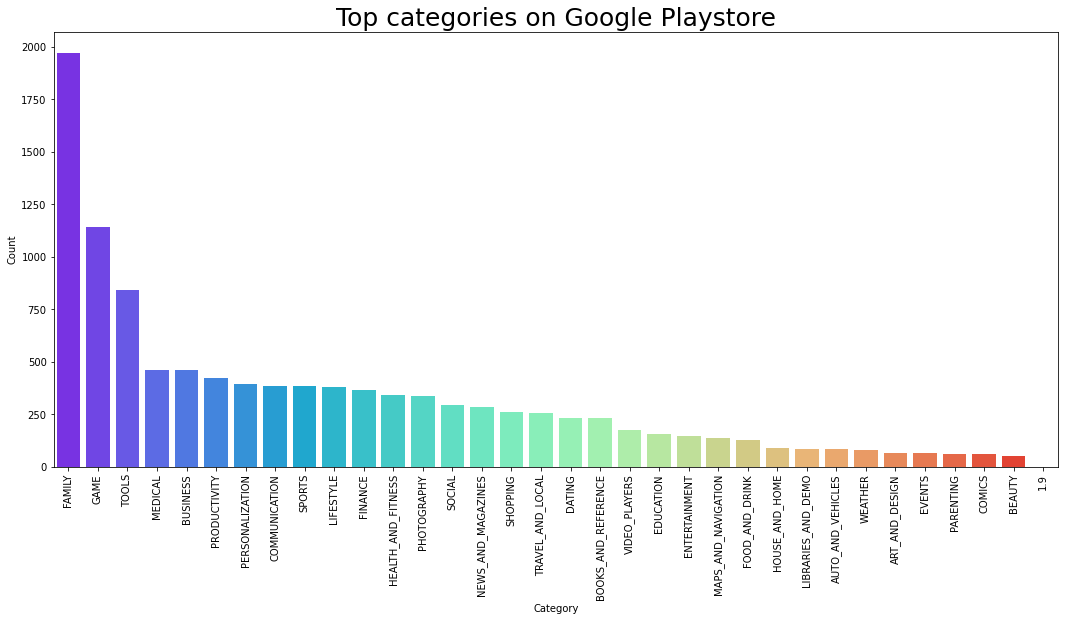

In [74]:
# Plotting graph/visuals for the same
plt.figure(figsize=(18,8))
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
category_graph = sns.barplot(x = xaxis, y = yaxis, palette= "rainbow")
category_graph.set_title("Top categories on Google Playstore", fontsize = 25);

## **Distribution Of Rating**

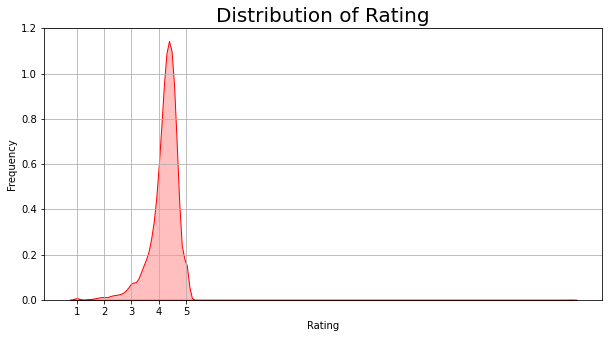

In [85]:
plt.figure(figsize=(10,5))
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks(range(1, 6))
plt.grid()
rating_distribution_graph = sns.kdeplot(play_store.Rating, color="red", shade = True)
plt.title('Distribution of Rating',size = 20);

## **Category With Highest Number Of Installations**

In [86]:
highest_Installs = play_store.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

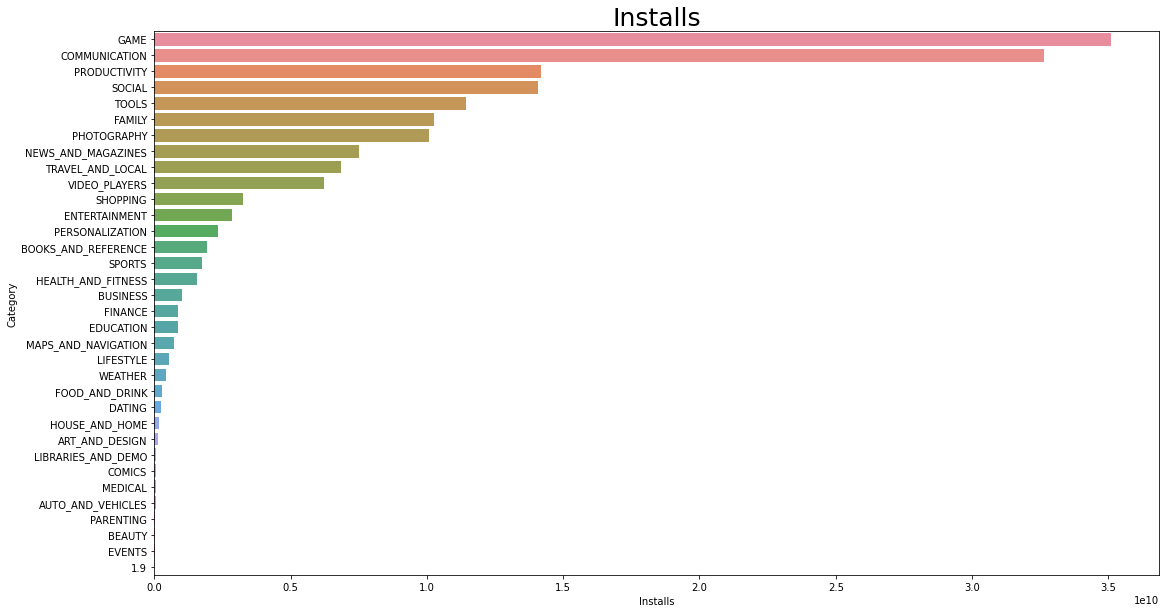

In [91]:
x1axis = []
y1axis = []

for i in range(len(highest_Installs)):
    x1axis.append(highest_Installs.Installs[i])
    y1axis.append(highest_Installs.index[i])

plt.figure(figsize=(18,10))

plt.xlabel("Installs")
plt.ylabel("Category")
highest_installs_graph = sns.barplot(x = x1axis, y = y1axis, alpha =0.9, palette= "husl")
highest_installs_graph.set_title("Installs", fontsize = 25);

## **Categories Of Type-Free And Paid**

In [102]:
highest_Rating = play_store.groupby('Category')[['Rating']].sum().sort_values(by='Rating', ascending=False)

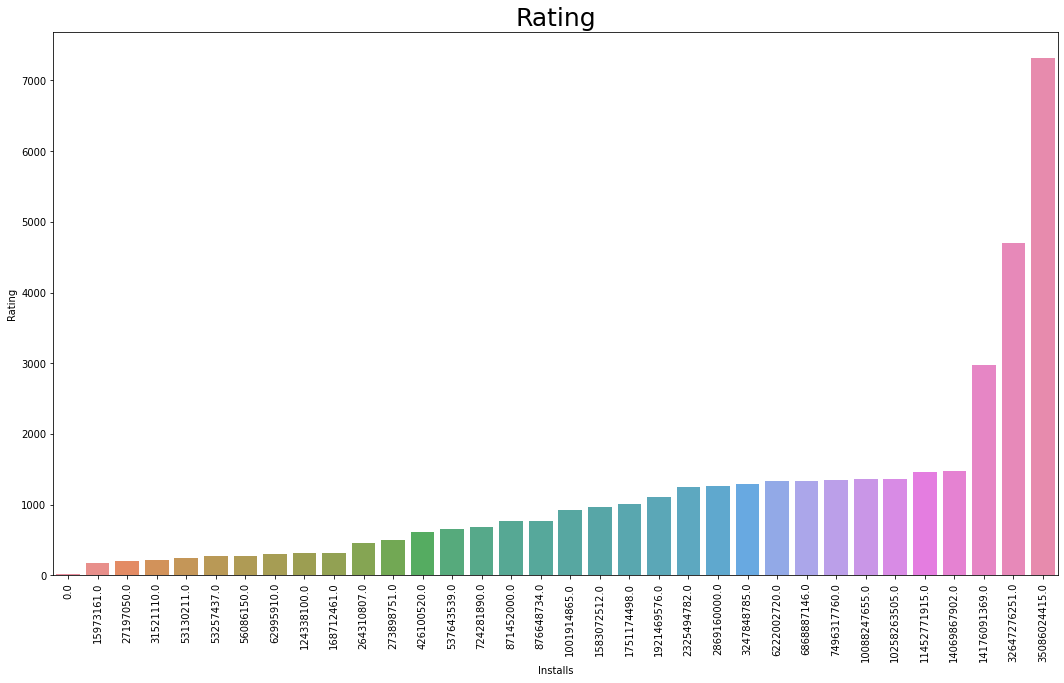

In [104]:
x2axis = []
y2axis = []

for i in range(len(highest_Installs)):
    x2axis.append(highest_Installs.Installs[i])
for j in range(len(highest_Rating)):
    y2axis.append(highest_Rating.Rating[j])

plt.figure(figsize=(18,10))

plt.xlabel("Installs")
plt.ylabel("Rating")
plt.xticks(rotation=90)
highest_installs_rating_graph = sns.barplot(x = x2axis, y = y2axis, alpha =0.9, palette= "husl")
highest_installs_rating_graph.set_title("Rating", fontsize = 25);

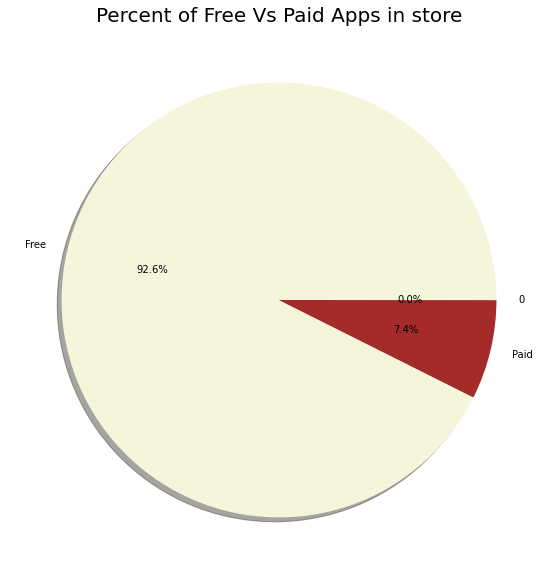

In [113]:
plt.figure(figsize=(10,10))
labels = play_store['Type'].value_counts(sort = True).index
sizes = play_store['Type'].value_counts(sort = True)
colors = ["beige","brown"]

plt.pie(sizes , labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()